In [ ]:
# import numpy as np
# import matplotlib.pyplot as plt
# import glob
# import json
# import re
# # from matplotlib import rcParams

# # # Use LaTeX-style fonts
# # rcParams['font.family'] = 'serif'
# # rcParams['font.serif'] = ['Computer Modern']
# # rcParams['text.usetex'] = True

# dt_string = '20241117_2300'
# broad_pattern = f'Z:\\Lab Data\\25lvl_SPAM\\RAW_data_from_ion_control\\25lvl_Heralded_SPAM_{dt_string}_Ket_*'
# matching_files = glob.glob(broad_pattern)
# filtered_files = [f for f in matching_files if re.search(r'Ket_(\d{3})$', f)]
# matching_files = sorted(filtered_files, key=lambda x: int(re.search(r'Ket_(\d{3})$', x).group(1)))[:-1]
# # print(sorted_files)
# num_kets = len(matching_files)
# # print(matching_files)
# arrays = []
# for i, name in enumerate(matching_files):
#     file_path = name
#     arrays = []
#     with open(file_path, 'r') as file:
#         for line in file:
#             data = json.loads(line)
#             arrays.append(data[0]["0"])

# arrays_3d = np.zeros((num_kets, len(arrays), len(arrays[0])))
# arrays = []
# for i, name in enumerate(matching_files):
#     file_path = name
#     arrays = []
#     with open(file_path, 'r') as file:
#         for line in file:
#             data = json.loads(line)
#             arrays.append(data[0]["0"][:])
#         arrays_3d[i] = arrays
# plt.figure()
# hist_data = np.array(arrays_3d)
# flat_hist_data = hist_data.ravel()
# plt.hist(flat_hist_data, color='blue',bins = int(max(flat_hist_data)), alpha=0.7)
# plt.xticks(np.arange(0, max(flat_hist_data)+2, 2))
# plt.yscale('log')
# plt.show()
# print(max(flat_hist_data))

# def getShelvingThreshold(counts):
#     data_sorted = np.sort(counts, axis=None)
#     print(len(data_sorted))
#     data_sorted = data_sorted[2000:-2000]
#     if len(data_sorted) > 2000:
#         data_sorted = data_sorted[0:-1: round (data_sorted.size/(len(counts)*0.00150167))]
#     data_sorted_diff = data_sorted[1:-1] - data_sorted[0:-2]
#     # data_sorted_diff = np.diff(data_sorted)
#     data_diff_max = max(data_sorted_diff)
#     data_diff_maxind = np.argmax(data_sorted_diff)
#     threshold = data_diff_max/2 + data_sorted[data_diff_maxind]
#     return threshold, data_sorted

# import numpy as np




# threshold,_ = getShelvingThreshold(flat_hist_data)

# print(threshold)

# bool_array = arrays_3d > 8
# bool_matrix = bool_array
# result_matrix = np.full(bool_matrix.shape, False, dtype=bool)

# not_all_darks = []
# for matrix_index in range(bool_matrix.shape[0]):
#     for row_index in range(bool_matrix.shape[1]):
#         true_indices = np.where(bool_matrix[matrix_index, row_index, :])
#         if true_indices[0].size > 0:
#             first_true_index = true_indices[0]
#             if first_true_index[0] != 0:
#                 result_matrix[matrix_index, row_index, first_true_index[0]] = True

# filtered_data_array = []
# percentage_data_used = []
# for i in range(num_kets):
#     data = result_matrix[i]
#     rows_with_any_true = data.any(axis=1)
#     filtered_data = data[rows_with_any_true]
#     filtered_data_array.append(filtered_data)
#     percentage_data_used.append(filtered_data.shape[0] / data.shape[0])
#     print(i, data.shape[0] - filtered_data.shape[0], filtered_data.shape[0], matching_files[i])
# # print(len(percentage_data_used))
# data = []
# for i in filtered_data_array:
#     data.append(np.mean(i, axis=0))

# data = np.array(data)
# data = data[:, 1:]

# fig = plt.figure(figsize=(16, 10))
# gs = fig.add_gridspec(1, 2, width_ratios=[25, 1], wspace=0.01)  # Reduce wspace to bring plots closer

# fig, (ax_main, ax_side) = plt.subplots(1, 2, gridspec_kw={'width_ratios': [25, 1]}, figsize=(16, 10))
# fig.tight_layout(pad=2.0, w_pad=0.1, h_pad=0.0)  # Adjust the w_pad to make the plots closer

# # Main 25x25 imshow plot
# cmap = plt.get_cmap("viridis")
# im = ax_main.imshow(data, cmap=cmap)

# tick_labels_x = [f'$|{i}\\rangle$' for i in range(len(arrays[0]))]
# tick_labels_y = [f'$|{i}\\rangle$' for i in range(len(data))]

# ax_main.set_xticks(range(len(arrays[0])))
# ax_main.set_xticklabels(tick_labels_x, fontsize=12, rotation=45)
# ax_main.set_yticks(range(num_kets))
# ax_main.set_yticklabels(tick_labels_y, fontsize=12, rotation=45)

# ax_main.invert_yaxis()
# ax_main.set_xlabel('Measured State',fontsize=12)
# ax_main.set_ylabel('Prepared State',fontsize=12)

# for i in range(data.shape[0]):
#     for j in range(data.shape[1]):
#         if data[i, j] > 0.00:
#             ax_main.text(j, i, f'{data[i, j] * 100:.1f}', ha='center', va='center', color='black' if data[i, j] > 0.5 else 'white', fontsize=10)

# off_diagonal_data = np.diag(data)
# off_diagonal_avg = np.sum(off_diagonal_data[:num_kets]) / num_kets

# ax_main.set_title(f'{np.shape(data)[1]} Level Heralded SPAM - Average Fidelity {np.round(off_diagonal_avg * 100, 3)}%')

# for x in np.arange(-0.5, data.shape[1], 1):
#     ax_main.vlines(x, *ax_main.get_ylim(), color='gray', linestyle='-', linewidth=0.5)
# for y in np.arange(-0.5, data.shape[0], 1):
#     ax_main.hlines(y, *ax_main.get_xlim(), color='gray', linestyle='-', linewidth=0.5)

# # Secondary 25x1 imshow plot
# side_data = np.array(percentage_data_used).reshape(-1, 1)
# im_side = ax_side.imshow(side_data, cmap='viridis', aspect='auto',vmin= 0, vmax = 1)

# ax_side.yaxis.set_label_position("right")
# ax_side.yaxis.tick_right()

# ax_side.set_yticks(range(num_kets))
# ax_side.set_yticklabels(tick_labels_y, fontsize=12, rotation=45)
# ax_side.set_xticks([])
# ax_side.invert_yaxis()
# ax_side.set_ylabel('Data rate')

# # Annotate the secondary plot with percentage values
# for i in range(len(percentage_data_used)):
#     value = percentage_data_used[i]
#     ax_side.text(0, i, f'{value * 100:.1f}%', ha='center', va='center', color='black' if value > 50 else 'black', fontsize=10)

# # Adjust the position of the secondary plot to be closer to the main plot
# pos1 = ax_main.get_position()  # get the original position
# pos2 = [pos1.x0 + 0.04, pos1.y0, pos1.width, pos1.height]  # adjust the position
# ax_main.set_position(pos2)  # set a new position
# ax_side.set_position([pos2[0] + pos2[2] + 0.01, pos2[1], 0.05, pos2[3]])  # set a new position for the side plot

# plt.savefig(f'{np.shape(data)[1]}_lvl_heralded_spam_{dt_string}_{int(np.round(off_diagonal_avg * 100))}.png', dpi=300)
# plt.show()


Searching files with pattern: Z:\Lab Data\25_level_coherence_paper_data\5K_SPAM\InitKet_0\SPAM_10k_Heralded_*
Total sorted data points: 130000
Threshold recalculated using histogram: 11
5000
4999
[ True  True  True ...  True  True  True]
4902
Searching files with pattern: Z:\Lab Data\25_level_coherence_paper_data\5K_SPAM\InitKet_1\SPAM_10k_Heralded_*
Total sorted data points: 130000
Threshold recalculated using histogram: 11
5000
4956
[ True  True  True ...  True  True  True]
4887
Searching files with pattern: Z:\Lab Data\25_level_coherence_paper_data\5K_SPAM\InitKet_2\SPAM_10k_Heralded_*
Total sorted data points: 130000
Threshold recalculated using histogram: 11
5000
4933
[ True  True False ...  True  True  True]
4846
Searching files with pattern: Z:\Lab Data\25_level_coherence_paper_data\5K_SPAM\InitKet_3\SPAM_10k_Heralded_*
Total sorted data points: 130000
5000
4945
[ True  True  True ...  True  True  True]
4820
Searching files with pattern: Z:\Lab Data\25_level_coherence_paper_data

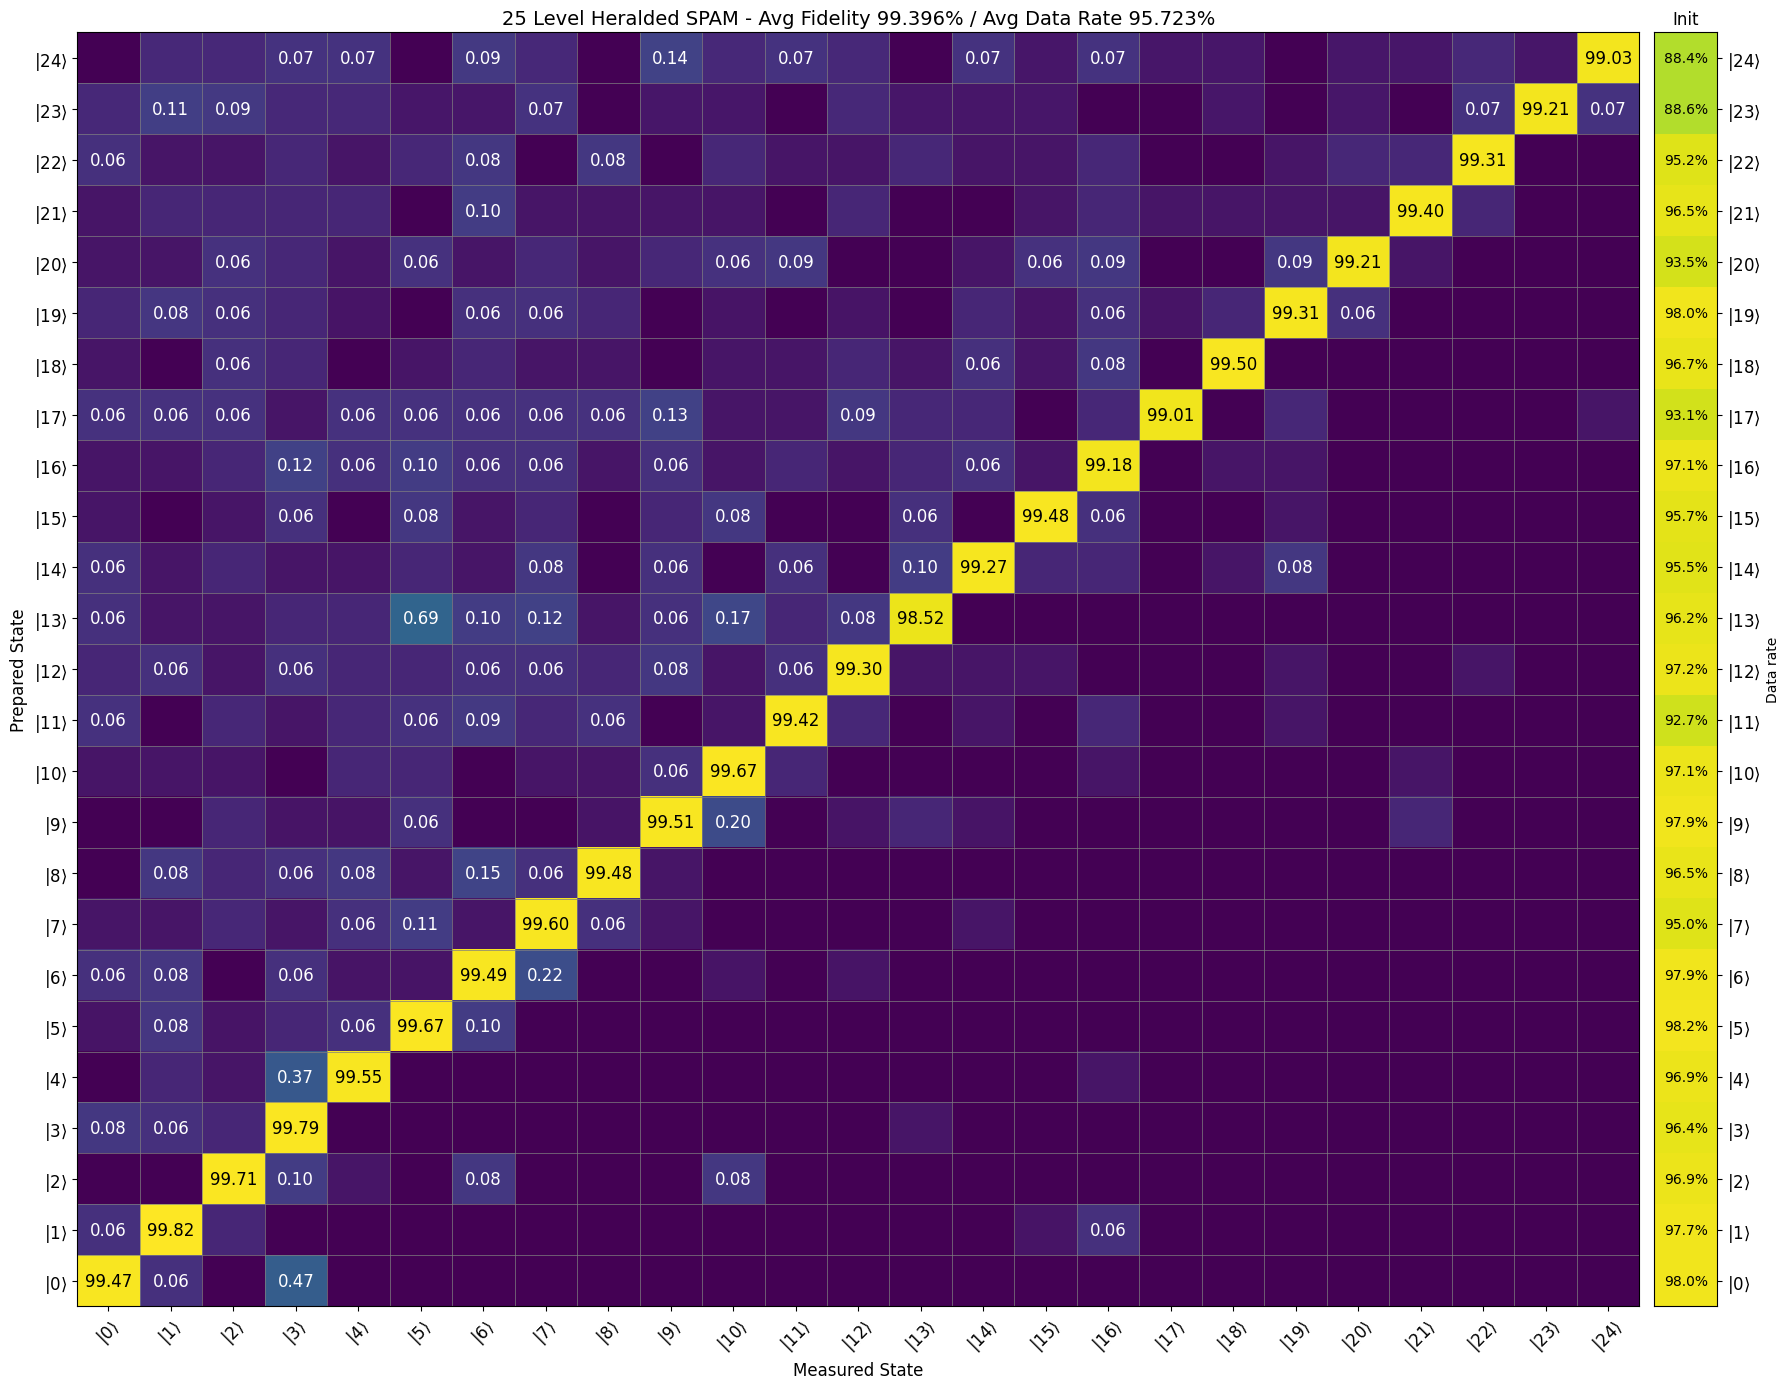

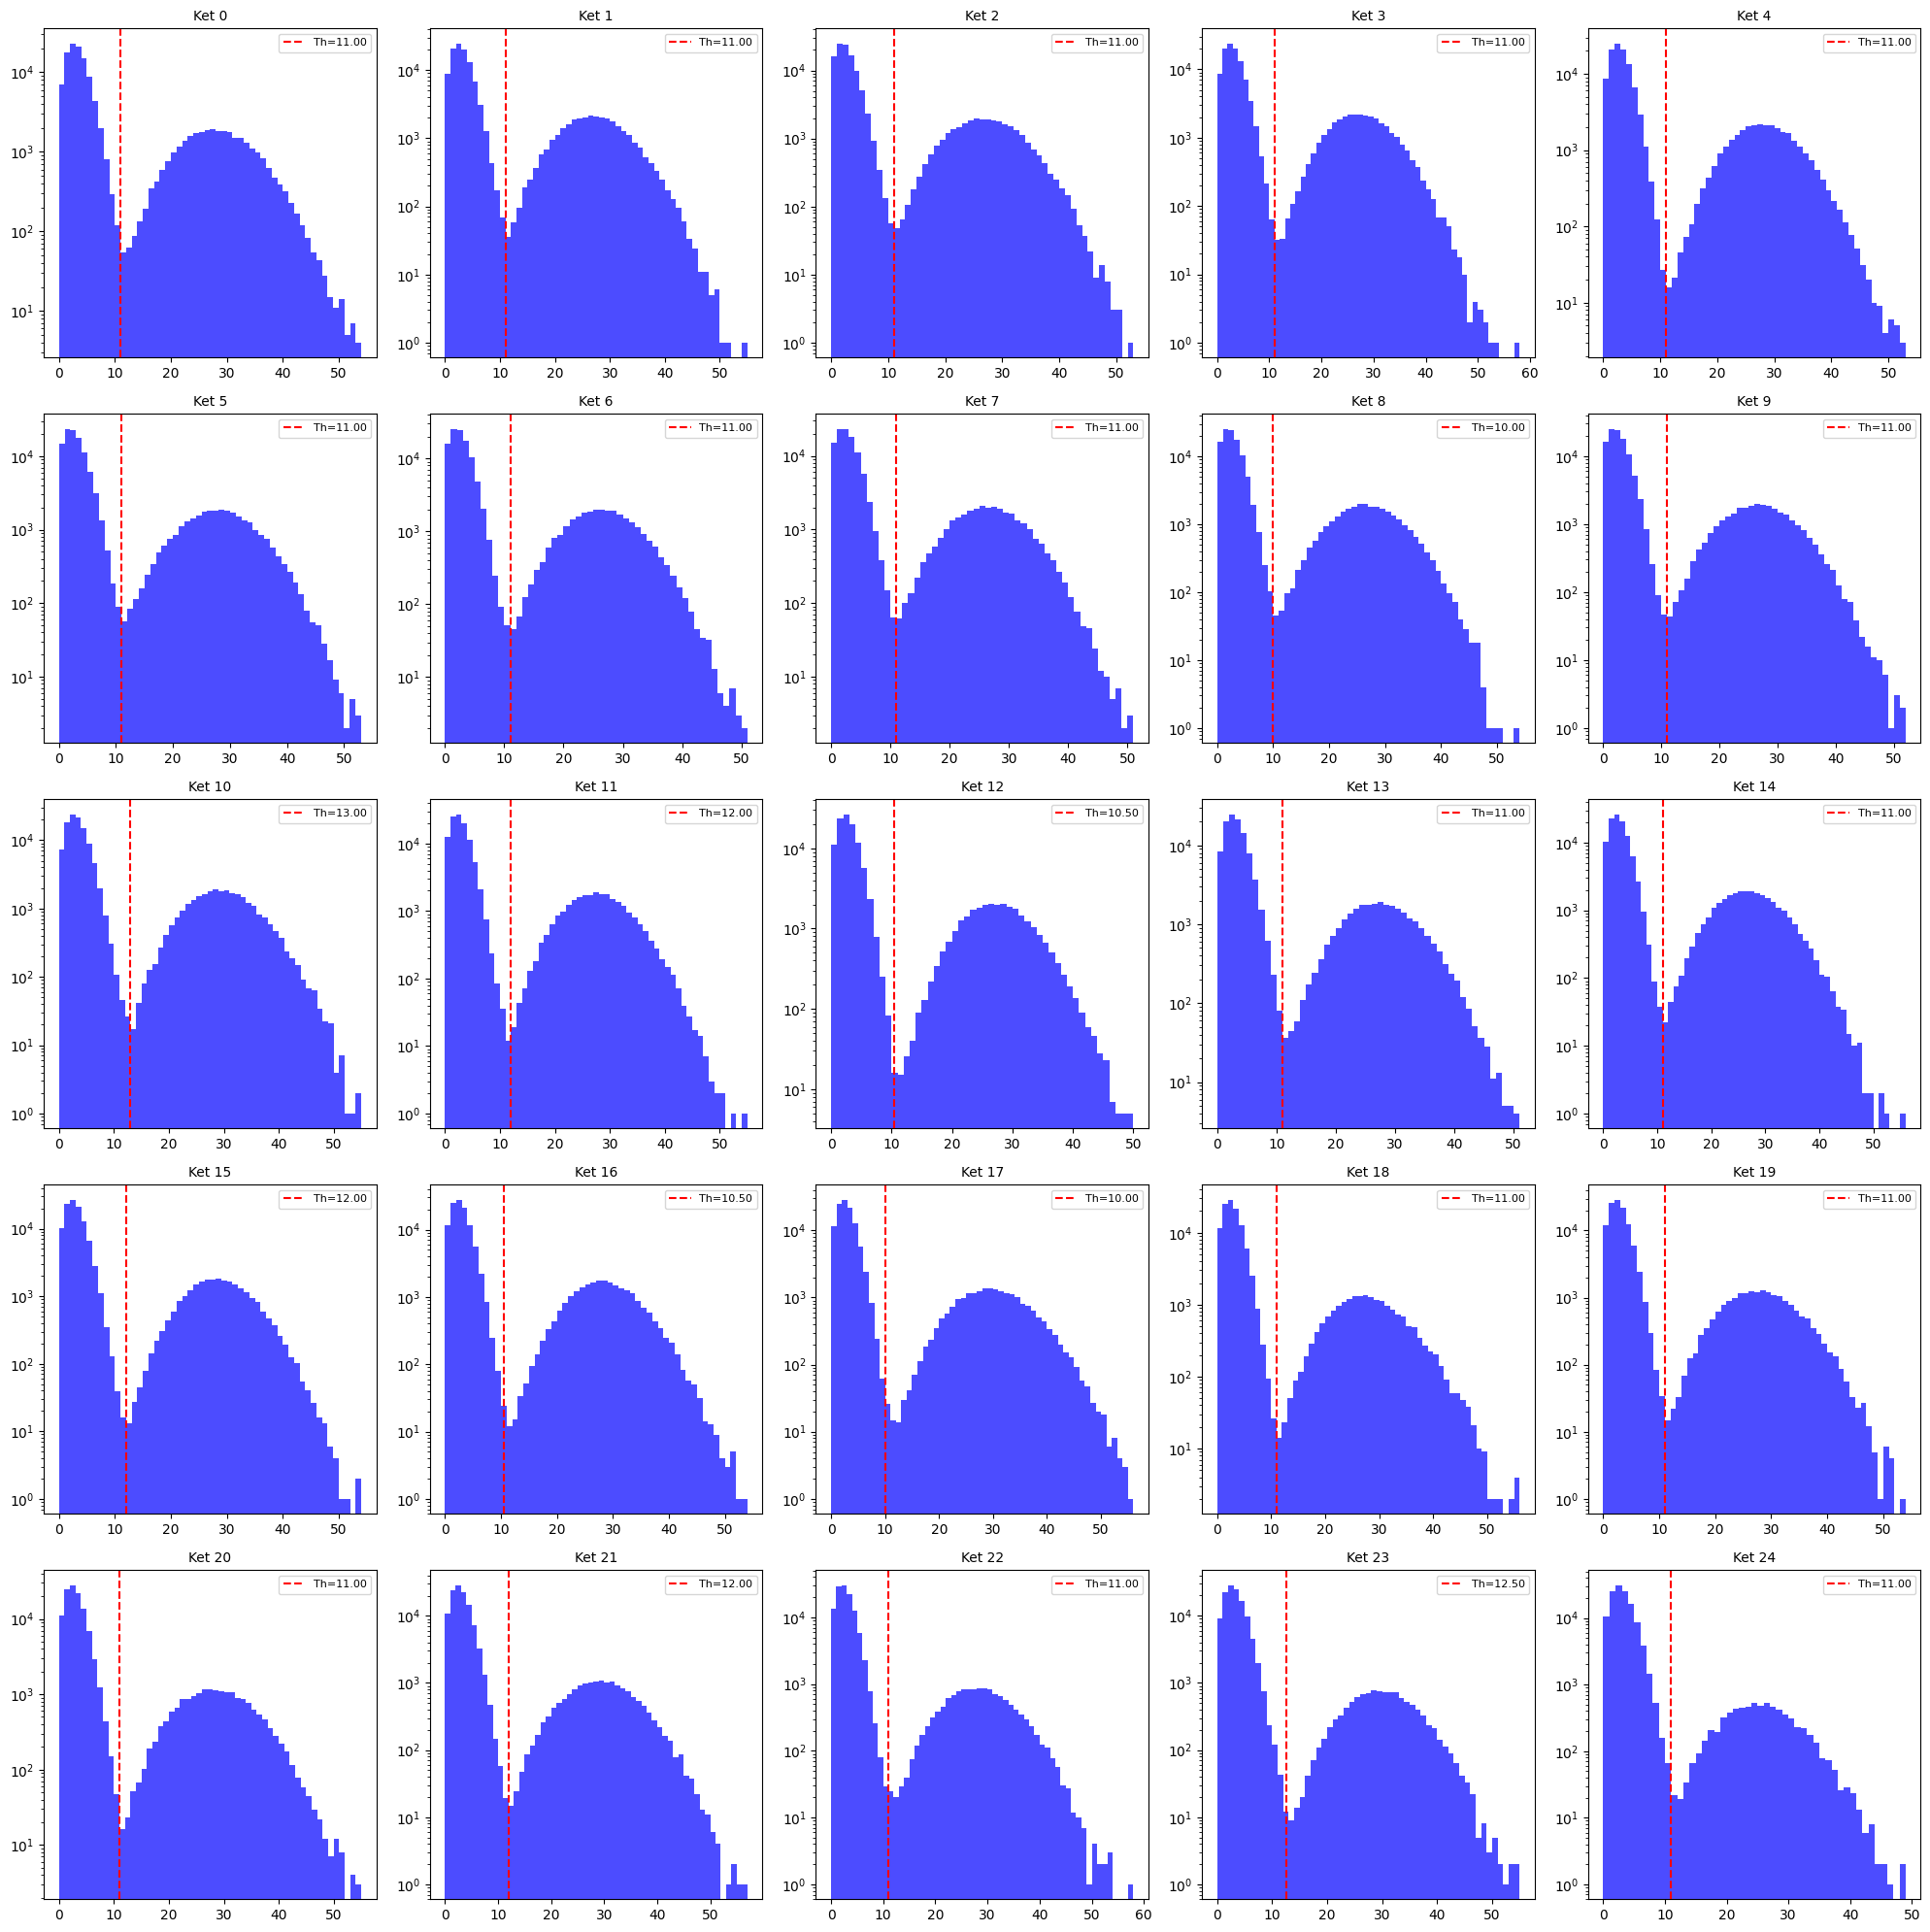

In [82]:
import numpy as np
import matplotlib.pyplot as plt
import glob
import json
import re
import os

def load_experiments_from_folder(folder_path, mode='last'):
    """
    Load experiments from a given ket folder.
    
    Each text file in the folder is assumed to contain multiple experiments 
    (one JSON object per line, where each JSON is a list with a dictionary and key "0").
    
    Parameters:
        folder_path: string, path to the ket folder.
        mode: 'last' to load only the last saved file (by sorted order)
              'all' to load all files in the folder.
    
    Returns:
        A list of experiments. Each experiment is a list of counts.
    """
    # Adjust the pattern to match your new file names
    file_pattern = os.path.join(folder_path, 'SPAM_10k_Heralded_*')
    print("Searching files with pattern:", file_pattern)
    file_list = sorted(glob.glob(file_pattern))
    if not file_list:
        return []  # No files found
    if mode == 'last':
        file_list = [file_list[-1]]  # Only the last file

    experiments = []
    for file in file_list:
        with open(file, 'r') as f:
            for line in f:
                data = json.loads(line)
                # Assumes each line is a list with a dict containing key "0"
                experiments.append(data[0]["0"])
    return experiments

def getShelvingThreshold(counts):
    data_sorted = np.sort(counts, axis=None)
    print("Total sorted data points:", len(data_sorted))
    # Remove extreme ends (if possible)
    if len(data_sorted) > 4000:
        data_sorted = data_sorted[2000:-2000]
    if len(data_sorted) > 2000:
        step = round(data_sorted.size / (len(counts) * 0.0250167))
        if step < 1:
            step = 1
        data_sorted = data_sorted[0:-1:step]
    data_sorted_diff = data_sorted[1:-1] - data_sorted[0:-2]
    data_diff_max = max(data_sorted_diff)
    data_diff_maxind = np.argmax(data_sorted_diff)
    threshold = data_diff_max / 2 + data_sorted[data_diff_maxind]
    
    # New logic: if the calculated threshold is less than 2, recalculate using histogram data.
    if threshold < 2:
        # Calculate histogram in the x-range 4 to 30
        hist_counts, bin_edges = np.histogram(counts, bins=range(4, 31))
        # Find the bin (lowest bar) with the minimum count in that range
        min_bin_index = np.argmin(hist_counts)
        # Use the lower edge of that bin as the threshold
        threshold = bin_edges[min_bin_index]
        print(f"Threshold recalculated using histogram: {threshold}")
    
    return threshold, data_sorted

analysis_mode = 'all'  
base_dir = r'Z:\Lab Data\25_level_coherence_paper_data\5K_SPAM'
num_kets = 25  
ket_folders = [os.path.join(base_dir, f'InitKet_{i}') for i in range(num_kets)]

ket_avg_list = [None] * num_kets   # Average trigger vector (before removing first column)
ket_data_rate  = [0] * num_kets    # Data rate for each ket (fraction of experiments with valid trigger)
thresholds_info = [None] * num_kets  # For each ket: (flat_data, threshold, ket index)
all_darks = [0]*num_kets
for i, folder in enumerate(ket_folders):
    experiments = load_experiments_from_folder(folder, mode=analysis_mode)
    if len(experiments) == 0:
        print(f'No data found in {folder}. Marking ket {i} as invalid.')
        continue

    experiments = np.array(experiments)  # Shape: (num_experiments, experiment_length)
    flat_data = experiments.ravel()

    # Compute threshold and store for histogram plotting
    try:
        threshold, _ = getShelvingThreshold(flat_data)
    except Exception as e:
        print(f'Error computing threshold for ket {i}: {e}')
        threshold = None
    thresholds_info[i] = (flat_data, threshold, i)

    # Create boolean matrix: mark True if count > 8 (or you could use: experiments > threshold)
    bool_matrix = experiments >= threshold
    # not_all_dark = []
    not_all_dark_counts = 0
    result_matrix = np.full(bool_matrix.shape, False, dtype=bool)
    print(len(result_matrix))
    for row_index in range(bool_matrix.shape[0]):
        true_indices = np.where(bool_matrix[row_index, :])[0]
        if true_indices.size > 0:
            not_all_dark_counts += 1
            if true_indices[0] != 0:
                result_matrix[row_index, true_indices[0]] = True
    
    # Filter out experiments that never triggered the condition
    # plt.figure()
    # plt.imshow(result_matrix)
    # plt.show()
    all_darks[i] = (len(result_matrix) - not_all_dark_counts)/len(result_matrix)
    print(not_all_dark_counts)
    valid_rows = result_matrix.any(axis=1)
    print(valid_rows)
    filtered = result_matrix[valid_rows]
    print(len(filtered))
    data_rate = filtered.shape[0] / experiments.shape[0]
    ket_data_rate[i] = data_rate

    if filtered.shape[0] > 0:
        avg_vector = np.mean(filtered, axis=0)
        ket_avg_list[i] = avg_vector
    else:
        print(f'No valid trigger data for ket {i}.')
        ket_avg_list[i] = None
        ket_data_rate[i] = 0
print(all_darks)
measurement_dim = None
for vec in ket_avg_list:
    if vec is not None and len(vec) > 1:
        measurement_dim = len(vec) - 1
        break
# Build full data matrix with one row per ket.
# For valid kets, use avg_vector[1:]; for invalid, fill with zeros.
data_matrix = np.zeros((num_kets, measurement_dim))
for i in range(num_kets):
    if ket_avg_list[i] is not None and len(ket_avg_list[i]) > 1:
        vec = ket_avg_list[i][1:]
        # If the vector is longer than measurement_dim, truncate; if shorter, pad with zeros.
        if len(vec) >= measurement_dim:
            data_matrix[i, :] = vec[:measurement_dim]
        else:
            data_matrix[i, :len(vec)] = vec
    else:
        # Already zeros
        pass

# Compute fidelity and data rate averages from only valid kets.
valid_fidelity_list = []
valid_data_rate_list = []
for i in range(num_kets):
    if ket_avg_list[i] is not None:
        # For fidelity, mimic your original: use the diagonal element.
        # If i < measurement_dim, use data_matrix[i, i]; otherwise use the last element.
        if i < measurement_dim:
            fidelity = data_matrix[i, i]
        else:
            fidelity = data_matrix[i, -1]
        valid_fidelity_list.append(fidelity)
        if ket_data_rate[i] > 0:
            valid_data_rate_list.append(ket_data_rate[i])

if valid_fidelity_list:
    avg_fidelity = np.mean(valid_fidelity_list)
else:
    avg_fidelity = np.nan
if valid_data_rate_list:
    avg_data_rate = np.mean(valid_data_rate_list)
else:
    avg_data_rate = np.nan

# ===== MAIN ANALYSIS PLOT =====
fig, (ax_main, ax_side) = plt.subplots(1, 3, 
                                         gridspec_kw={'width_ratios': [25, 1, 1]}, 
                                         figsize=(22, 14))
cmap = plt.get_cmap("viridis")
num_prepared = num_kets  # now one row per ket folder
num_measured = measurement_dim

# im = ax_main.imshow(data_matrix, cmap=cmap, aspect='auto')

from matplotlib.colors import LogNorm, Normalize

# Set the background color to viridis(0) for NaNs
background_color = plt.get_cmap('viridis')(0)
ax_main.set_facecolor(background_color)

diag_mask = np.eye(data_matrix.shape[0], data_matrix.shape[1], dtype=bool)
off_diag_mask = ~diag_mask

diag_data = np.where(diag_mask, data_matrix, np.nan)  # nan so it's ignored in off-diag colormap
off_diag_data = np.where(off_diag_mask, data_matrix, np.nan)

# Diagonal: linear scale, e.g., from 0.5 to 1
im_diag = ax_main.imshow(diag_data, cmap='viridis', aspect='auto', norm=Normalize(vmin=0.50, vmax=1))

# Off-diagonal: log scale, e.g., from 1e-4 to 0.5
im_off_diag = ax_main.imshow(off_diag_data, cmap='viridis', aspect='auto', norm=LogNorm(vmin=1e-4, vmax=50))

tick_labels_x = [f'$|{j}\\rangle$' for j in range(num_measured)]
tick_labels_y = [f'$|{i}\\rangle$' for i in range(num_kets)]
ax_main.set_xticks(np.arange(num_measured))
ax_main.set_xticklabels(tick_labels_x, fontsize=12, rotation=45)
ax_main.set_yticks(np.arange(num_kets))
ax_main.set_yticklabels(tick_labels_y, fontsize=12)
ax_main.invert_yaxis()
ax_main.set_xlabel('Measured State', fontsize=12)
ax_main.set_ylabel('Prepared State', fontsize=12)

# Annotate each cell with its percentage value.
# Also for rows with no valid data, add a centered annotation.
for i in range(num_kets):
    if ket_avg_list[i] is None:
        ax_main.text(num_measured/2, i, 'No Valid Data', ha='center', va='center', 
                     color='red', fontsize=12, fontweight='bold')
    else:
        for j in range(num_measured):
            if data_matrix[i, j] > 0.0005:
                ax_main.text(j, i, f'{data_matrix[i, j]*100:.2f}', ha='center', va='center',
                             color='black' if data_matrix[i, j] > 0.5 else 'white', fontsize=12)

ax_main.set_title(f'{num_measured} Level Heralded SPAM - Avg Fidelity {np.round(avg_fidelity * 100, 3)}% / Avg Data Rate {np.round(avg_data_rate * 100, 3)}%', fontsize=14)

# Add grid lines
for x in np.arange(-0.5, num_measured, 1):
    ax_main.axvline(x, color='gray', linestyle='-', linewidth=0.5)
for y in np.arange(-0.5, num_prepared, 1):
    ax_main.axhline(y, color='gray', linestyle='-', linewidth=0.5)

# Side plot for data rate (one row per ket)
side_data = np.array(ket_data_rate).reshape(num_kets, 1)
im_side = ax_side.imshow(side_data, cmap='viridis', aspect='auto', vmin=0, vmax=1)
ax_side.yaxis.set_label_position("right")
ax_side.yaxis.tick_right()
ax_side.set_yticks(np.arange(num_kets))
ax_side.set_yticklabels(tick_labels_y, fontsize=12)
ax_side.set_xticks([])
ax_side.invert_yaxis()
ax_side.set_title('Init')
ax_side.set_ylabel('Data rate')
for i in range(num_kets):
    ax_side.text(0, i, f'{ket_data_rate[i] * 100:.1f}%', ha='center', va='center', color='black', fontsize=10)

plt.tight_layout()
plt.savefig(f'{num_measured}_lvl_heralded_spam_analysis.png', dpi=600)
plt.show()

# Plot one histogram per ket for up to 25 kets.
num_threshold_plots = min(25, num_kets)
fig, axs = plt.subplots(5, 5, figsize=(20, 20))
axs = axs.flatten()

for idx in range(num_threshold_plots):
    ax = axs[idx]
    info = thresholds_info[idx]
    if info is not None and info[1] is not None:
        flat_data, threshold, ket_idx = info
        bins = int(max(flat_data)) if max(flat_data) > 0 else 10
        ax.hist(flat_data, bins=bins, color='blue', alpha=0.7)
        # Plot vertical line at threshold
        ax.axvline(threshold, color='red', linestyle='--', label=f'Th={threshold:.2f}')
        ax.set_title(f'Ket {ket_idx}', fontsize=10)
        ax.set_yscale('log')
        ax.legend(fontsize=8)
    else:
        ax.text(0.5, 0.5, 'No Valid Data', ha='center', va='center', color='red', fontsize=12)
        ax.set_xticks([])
        ax.set_yticks([])
    
# Turn off any unused subplots in the 5x5 grid
for idx in range(num_threshold_plots, 25):
    axs[idx].axis('off')
    
plt.tight_layout()
plt.savefig('threshold_histograms_5x5.png', dpi=300)
plt.show()


In [19]:
%matplotlib widget

Searching files with pattern: Z:\Lab Data\25_level_coherence_paper_data\5K_SPAM\InitKet_0\SPAM_10k_Heralded_*
Total sorted data points: 130000
Threshold recalculated using histogram: 11
5000
4999
[ True  True  True ...  True  True  True]
4902
Searching files with pattern: Z:\Lab Data\25_level_coherence_paper_data\5K_SPAM\InitKet_1\SPAM_10k_Heralded_*
Total sorted data points: 130000
Threshold recalculated using histogram: 11
5000
4956
[ True  True  True ...  True  True  True]
4887
Searching files with pattern: Z:\Lab Data\25_level_coherence_paper_data\5K_SPAM\InitKet_2\SPAM_10k_Heralded_*
Total sorted data points: 130000
Threshold recalculated using histogram: 11
5000
4933
[ True  True False ...  True  True  True]
4846
Searching files with pattern: Z:\Lab Data\25_level_coherence_paper_data\5K_SPAM\InitKet_3\SPAM_10k_Heralded_*
Total sorted data points: 130000
5000
4945
[ True  True  True ...  True  True  True]
4820
Searching files with pattern: Z:\Lab Data\25_level_coherence_paper_data

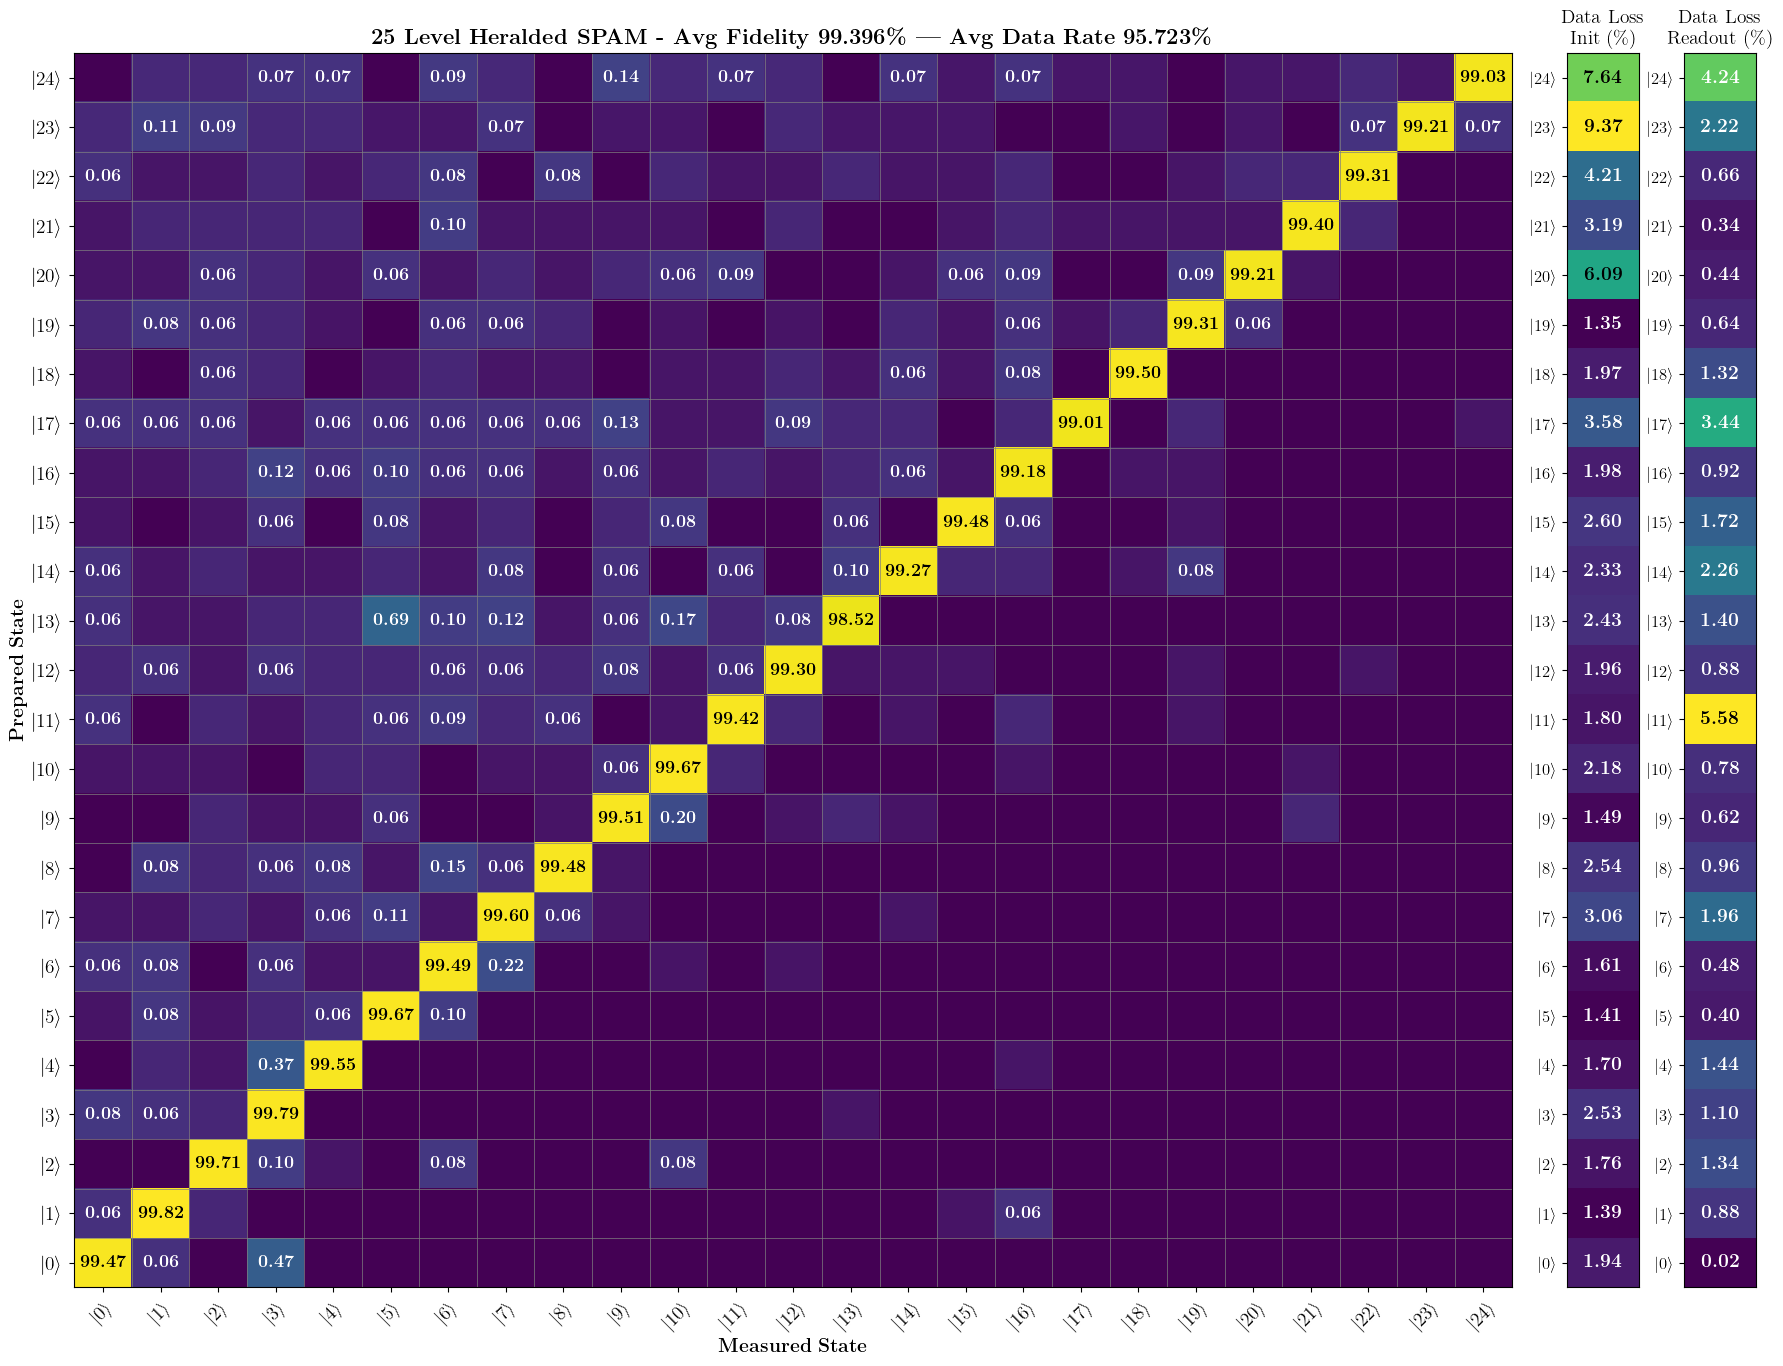

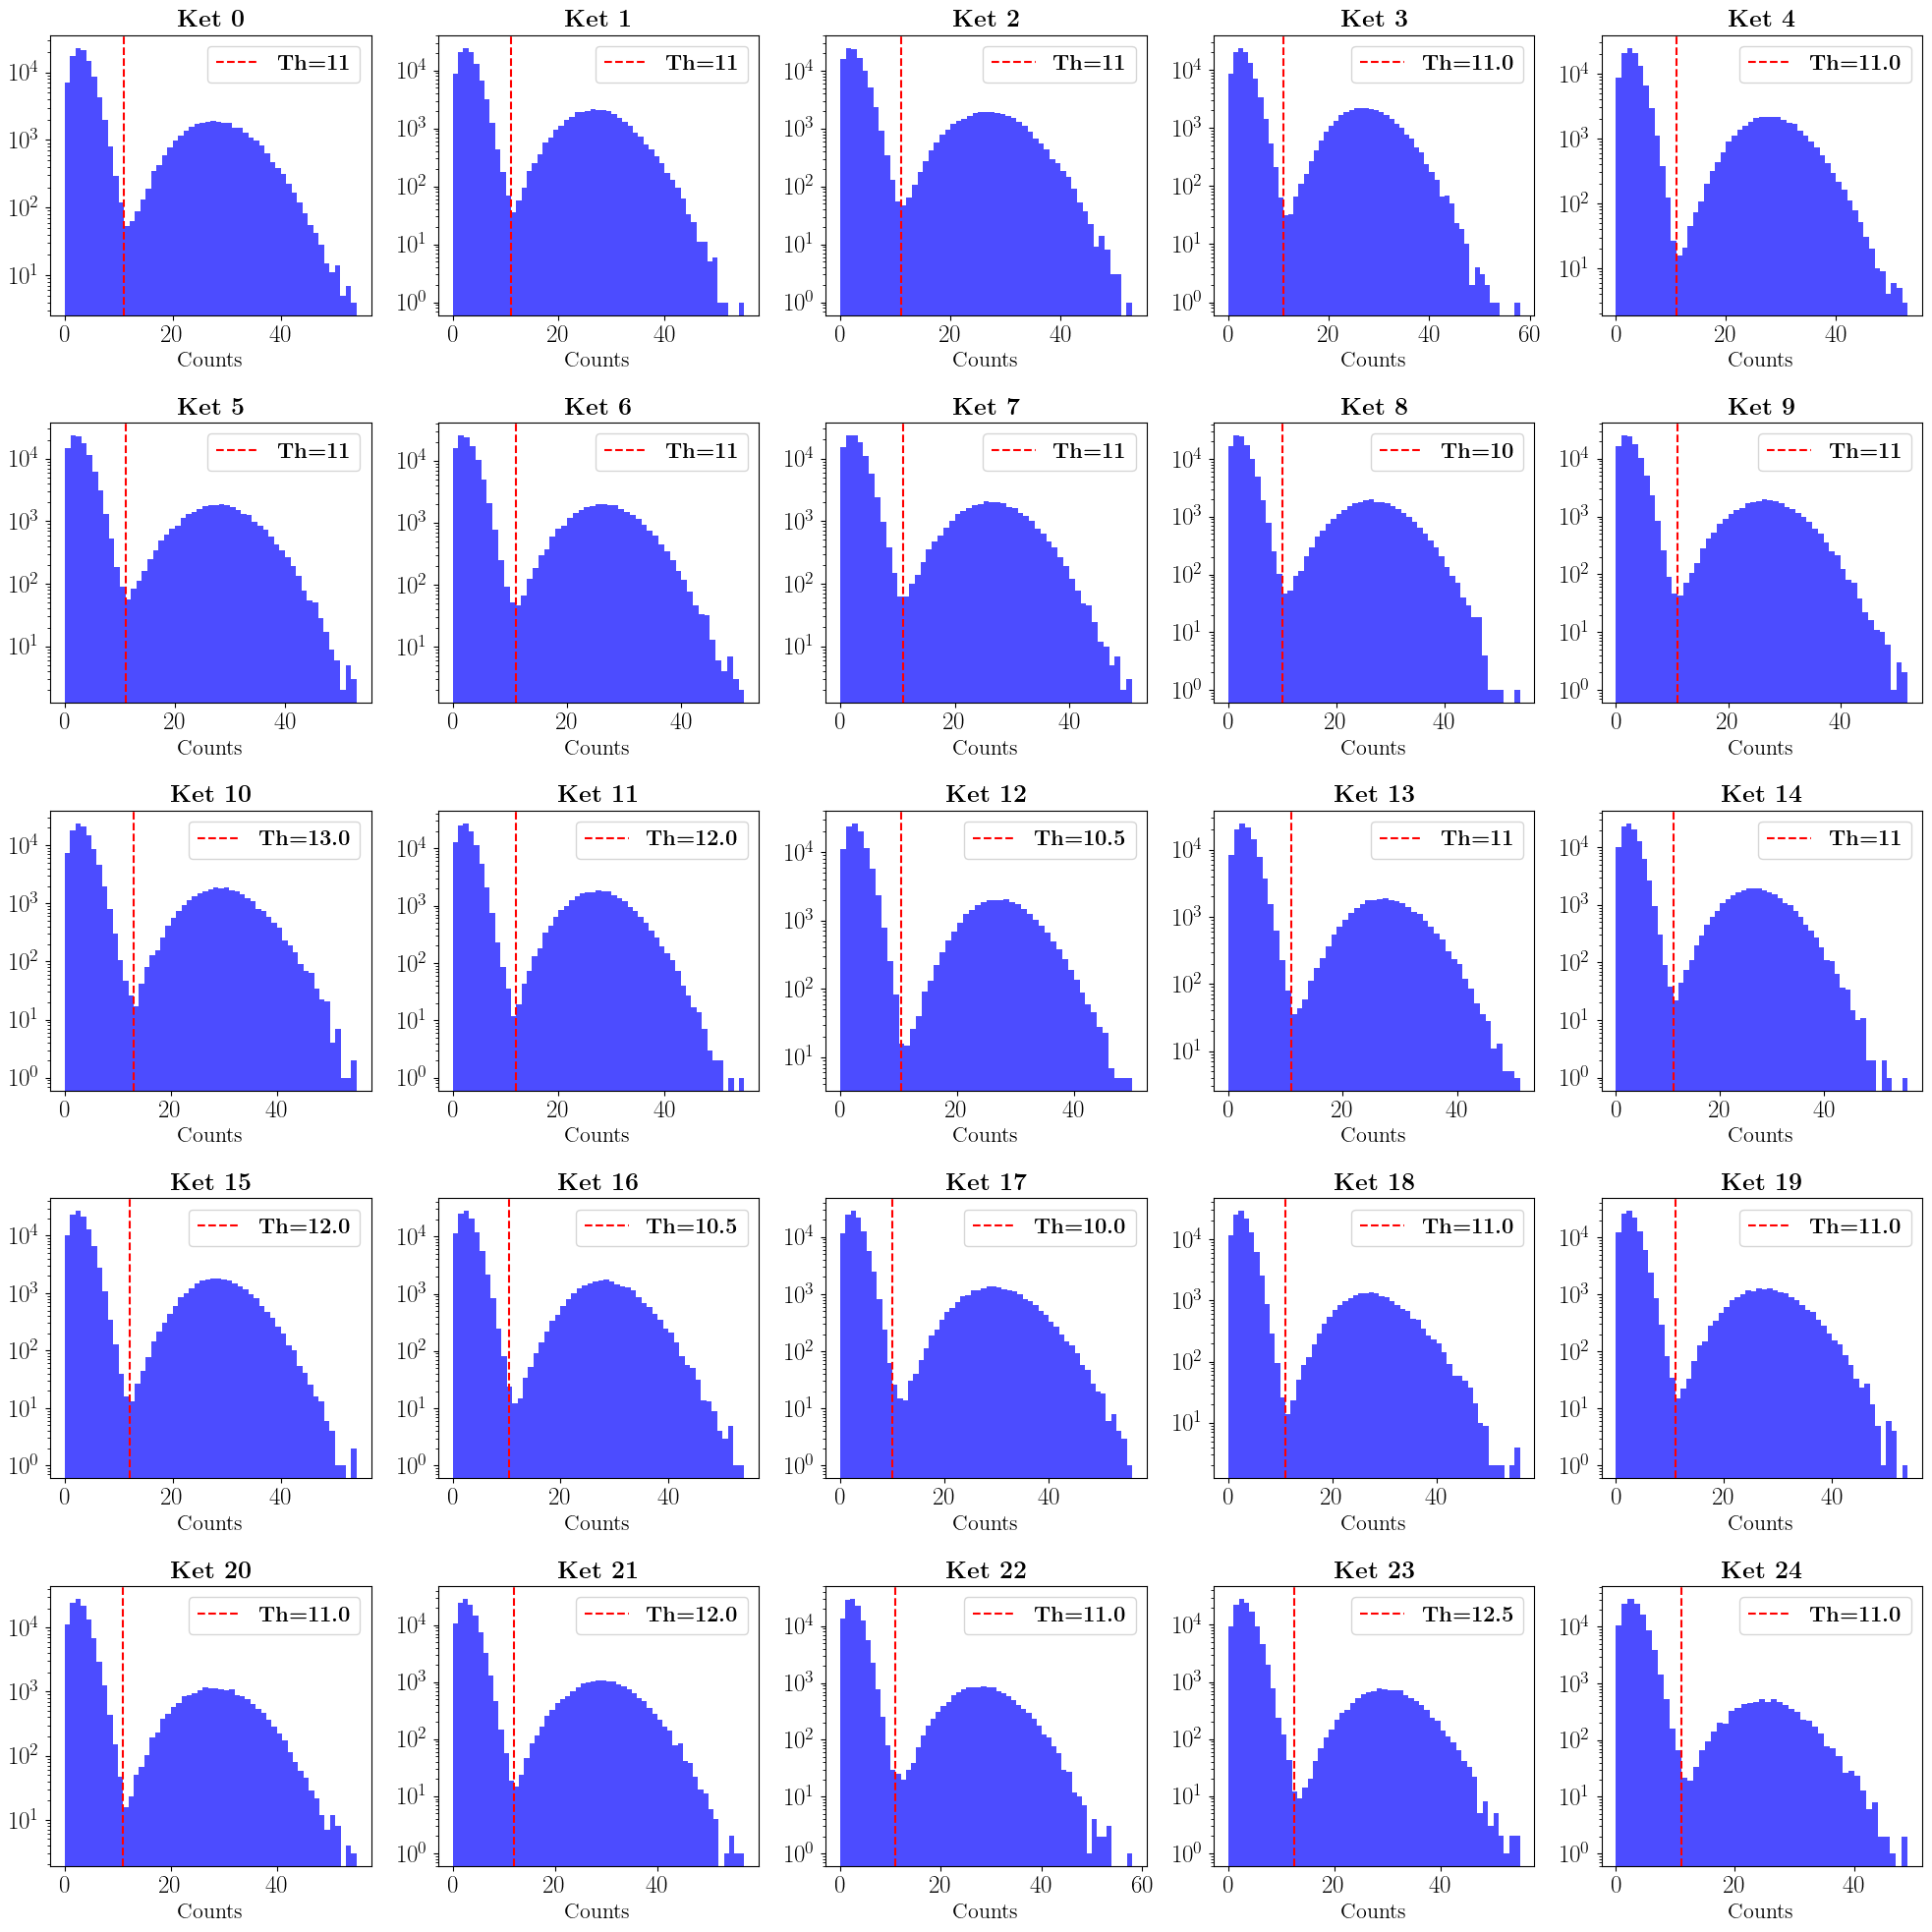

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams

rcParams['font.family'] = 'serif'
rcParams['font.serif'] = ['Computer Modern']
rcParams['text.usetex'] = True

rcParams['font.size'] = 18

# Axis title (i.e., the title of the figure or subplot)
rcParams['axes.titlesize'] = 24
rcParams['axes.titleweight'] = 'bold'  # 'bold' for bold titles

# Axis labels
rcParams['axes.labelsize'] = 20

# Tick labels
rcParams['xtick.labelsize'] = 18
rcParams['ytick.labelsize'] = 18

# Legend
rcParams['legend.fontsize'] = 20
rcParams['legend.title_fontsize'] = 20  # Title of the legend, if used

# Figure title (if using suptitle)
rcParams['figure.titlesize'] = 18
rcParams['legend.fontsize'] = 20

import glob
import json
import re
import os
from mpl_toolkits.axes_grid1 import make_axes_locatable

def load_experiments_from_folder(folder_path, mode='last'):
    """
    Load experiments from a given ket folder.
    
    Each text file in the folder is assumed to contain multiple experiments 
    (one JSON object per line, where each JSON is a list with a dictionary and key "0").
    
    Parameters:
        folder_path: string, path to the ket folder.
        mode: 'last' to load only the last saved file (by sorted order)
              'all' to load all files in the folder.
    
    Returns:
        A list of experiments. Each experiment is a list of counts.
    """
    # Adjust the pattern to match your new file names
    file_pattern = os.path.join(folder_path, 'SPAM_10k_Heralded_*')
    print("Searching files with pattern:", file_pattern)
    file_list = sorted(glob.glob(file_pattern))
    if not file_list:
        return []  # No files found
    if mode == 'last':
        file_list = [file_list[-1]]  # Only the last file

    experiments = []
    for file in file_list:
        with open(file, 'r') as f:
            for line in f:
                data = json.loads(line)
                # Assumes each line is a list with a dict containing key "0"
                experiments.append(data[0]["0"])
    return experiments

def getShelvingThreshold(counts):
    data_sorted = np.sort(counts, axis=None)
    print("Total sorted data points:", len(data_sorted))
    # Remove extreme ends (if possible)
    if len(data_sorted) > 4000:
        data_sorted = data_sorted[2000:-2000]
    if len(data_sorted) > 2000:
        step = round(data_sorted.size / (len(counts) * 0.0250167))
        if step < 1:
            step = 1
        data_sorted = data_sorted[0:-1:step]
    data_sorted_diff = data_sorted[1:-1] - data_sorted[0:-2]
    data_diff_max = max(data_sorted_diff)
    data_diff_maxind = np.argmax(data_sorted_diff)
    threshold = data_diff_max / 2 + data_sorted[data_diff_maxind]
    
    # New logic: if the calculated threshold is less than 2, recalculate using histogram data.
    if threshold < 2:
        # Calculate histogram in the x-range 4 to 30
        hist_counts, bin_edges = np.histogram(counts, bins=range(4, 31))
        # Find the bin (lowest bar) with the minimum count in that range
        min_bin_index = np.argmin(hist_counts)
        # Use the lower edge of that bin as the threshold
        threshold = bin_edges[min_bin_index]
        print(f"Threshold recalculated using histogram: {threshold}")
    
    return threshold, data_sorted

analysis_mode = 'all'  
base_dir = r'Z:\Lab Data\25_level_coherence_paper_data\5K_SPAM'
num_kets = 25  
ket_folders = [os.path.join(base_dir, f'InitKet_{i}') for i in range(num_kets)]

ket_avg_list = [None] * num_kets   # Average trigger vector (before removing first column)
ket_data_rate  = [0] * num_kets    # Data rate for each ket (fraction of experiments with valid trigger)
thresholds_info = [None] * num_kets  # For each ket: (flat_data, threshold, ket index)
all_darks = [0]*num_kets

overall_data_rate = []
for i, folder in enumerate(ket_folders):
    experiments = load_experiments_from_folder(folder, mode=analysis_mode)
    if len(experiments) == 0:
        print(f'No data found in {folder}. Marking ket {i} as invalid.')
        continue

    experiments = np.array(experiments)  # Shape: (num_experiments, experiment_length)
    flat_data = experiments.ravel()

    # Compute threshold and store for histogram plotting
    try:
        threshold, _ = getShelvingThreshold(flat_data)
    except Exception as e:
        print(f'Error computing threshold for ket {i}: {e}')
        threshold = None
    thresholds_info[i] = (flat_data, threshold, i)

    # Create boolean matrix: mark True if count > 8 (or you could use: experiments > threshold)
    bool_matrix = experiments >= threshold
    # not_all_dark = []
    not_all_dark_counts = 0
    result_matrix = np.full(bool_matrix.shape, False, dtype=bool)
    print(len(result_matrix))
    for row_index in range(bool_matrix.shape[0]):
        true_indices = np.where(bool_matrix[row_index, :])[0]
        if true_indices.size > 0:
            not_all_dark_counts += 1
            if true_indices[0] != 0:
                result_matrix[row_index, true_indices[0]] = True
    
    # Filter out experiments that never triggered the condition
    # plt.figure()
    # plt.imshow(result_matrix)
    # plt.show()
    all_darks[i] = (len(result_matrix) - not_all_dark_counts)/len(result_matrix)
    print(not_all_dark_counts)
    valid_rows = result_matrix.any(axis=1)
    print(valid_rows)
    filtered = result_matrix[valid_rows]
    print(len(filtered))
    data_rate = (not_all_dark_counts - filtered.shape[0]) / not_all_dark_counts
    ket_data_rate[i] = data_rate
    overall_data_rate.append(filtered.shape[0]/len(result_matrix))
    if filtered.shape[0] > 0:
        avg_vector = np.mean(filtered, axis=0)
        ket_avg_list[i] = avg_vector
    else:
        print(f'No valid trigger data for ket {i}.')
        ket_avg_list[i] = None
        ket_data_rate[i] = 0
print(all_darks)
measurement_dim = None
for vec in ket_avg_list:
    if vec is not None and len(vec) > 1:
        measurement_dim = len(vec) - 1
        break
# Build full data matrix with one row per ket.
# For valid kets, use avg_vector[1:]; for invalid, fill with zeros.
data_matrix = np.zeros((num_kets, measurement_dim))
for i in range(num_kets):
    if ket_avg_list[i] is not None and len(ket_avg_list[i]) > 1:
        vec = ket_avg_list[i][1:]
        # If the vector is longer than measurement_dim, truncate; if shorter, pad with zeros.
        if len(vec) >= measurement_dim:
            data_matrix[i, :] = vec[:measurement_dim]
        else:
            data_matrix[i, :len(vec)] = vec
    else:
        # Already zeros
        pass

# Compute fidelity and data rate averages from only valid kets.
valid_fidelity_list = []
valid_data_rate_list = []
for i in range(num_kets):
    if ket_avg_list[i] is not None:
        # For fidelity, mimic your original: use the diagonal element.
        # If i < measurement_dim, use data_matrix[i, i]; otherwise use the last element.
        if i < measurement_dim:
            fidelity = data_matrix[i, i]
        else:
            fidelity = data_matrix[i, -1]
        valid_fidelity_list.append(fidelity)
        if ket_data_rate[i] > 0:
            valid_data_rate_list.append(ket_data_rate[i])

if valid_fidelity_list:
    avg_fidelity = np.mean(valid_fidelity_list)
else:
    avg_fidelity = np.nan
if valid_data_rate_list:
    avg_data_rate = np.mean(valid_data_rate_list)
else:
    avg_data_rate = np.nan

# ===== MAIN ANALYSIS PLOT =====
fig, ax_main = plt.subplots(1, 1, figsize=(18, 14))

cmap = plt.get_cmap("viridis")
num_prepared = num_kets  # now one row per ket folder
num_measured = measurement_dim

# im = ax_main.imshow(data_matrix, cmap=cmap, aspect='auto')

from matplotlib.colors import LogNorm, Normalize

# Set the background color to viridis(0) for NaNs
background_color = plt.get_cmap('viridis')(0)
ax_main.set_facecolor(background_color)

diag_mask = np.eye(data_matrix.shape[0], data_matrix.shape[1], dtype=bool)
off_diag_mask = ~diag_mask

diag_data = np.where(diag_mask, data_matrix, np.nan)  # nan so it's ignored in off-diag colormap
off_diag_data = np.where(off_diag_mask, data_matrix, np.nan)

# Diagonal: linear scale, e.g., from 0.5 to 1
im_diag = ax_main.imshow(diag_data, cmap='viridis', aspect='auto', norm=Normalize(vmin=0.50, vmax=1))

# Off-diagonal: log scale, e.g., from 1e-4 to 0.5
im_off_diag = ax_main.imshow(off_diag_data, cmap='viridis', aspect='auto', norm=LogNorm(vmin=1e-4, vmax=50))

tick_labels_x = [f'$|{j}\\rangle$' for j in range(num_measured)]
tick_labels_y = [f'$|{i}\\rangle$' for i in range(num_kets)]
ax_main.set_xticks(np.arange(num_measured))
ax_main.set_xticklabels(tick_labels_x, fontsize=14, rotation=45)
ax_main.set_yticks(np.arange(num_kets))
ax_main.set_yticklabels(tick_labels_y, fontsize=14)
ax_main.invert_yaxis()
ax_main.set_xlabel(r'\textbf{Measured State}', fontsize=14)
ax_main.set_ylabel(r'\textbf{Prepared State}', fontsize=14)

# Annotate each cell with its percentage value.
# Also for rows with no valid data, add a centered annotation.
for i in range(num_kets):
    if ket_avg_list[i] is None:
        ax_main.text(num_measured/2, i, 'No Valid Data', ha='center', va='center', 
                     color='red', fontsize=12, fontweight='bold')
    else:
        for j in range(num_measured):
            if data_matrix[i, j] > 0.0005:
                ax_main.text(j, i, rf'\textbf{{{data_matrix[i, j]*100:.2f}}}', ha='center', va='center',
                             color='black' if data_matrix[i, j] > 0.5 else 'white', fontsize=13)

ax_main.set_title(rf'\textbf{{{num_measured} Level Heralded SPAM - Avg Fidelity {np.round(avg_fidelity * 100, 3)}\%  |  Avg Data Rate {np.round(np.mean(overall_data_rate) * 100, 3)}\%}}', fontsize=16)

# Add grid lines
for x in np.arange(-0.5, num_measured, 1):
    ax_main.axvline(x, color='gray', linestyle='-', linewidth=0.5)
for y in np.arange(-0.5, num_prepared, 1):
    ax_main.axhline(y, color='gray', linestyle='-', linewidth=0.5)


# Side plot for data rate (one row per ket)
# Create divider to append two side axes to ax_main
divider = make_axes_locatable(ax_main)
cax1 = divider.append_axes("right", size="5%", pad=0.550)
cax2 = divider.append_axes("right", size="5%", pad=0.45)

# First side plot: ket_data_rate
# side_data_rate = (np.array(ket_data_rate)).reshape(num_kets, 1)
# im_side1 = cax1.imshow(side_data_rate, cmap='viridis', aspect='auto', norm=LogNorm(vmin=1e-4, vmax=100))
# cax1.set_yticks(np.arange(num_kets))
# cax1.set_yticklabels(tick_labels_y, fontsize=12)
# cax1.set_xticks([])
# cax1.invert_yaxis()
# cax1.set_title('Data Rate', fontsize=10)
# for i in range(num_kets):
#     cax1.text(0, i, f'{ket_data_rate[i] * 100:.1f}%', ha='center', va='center', color='black', fontsize=10)

# # Second side plot: all_darks
# side_darks = (np.array(all_darks)).reshape(num_kets, 1)
# im_side2 = cax2.imshow(side_darks, cmap='viridis', aspect='auto', norm=LogNorm(vmin=1e-4, vmax=100))
# cax2.set_yticks(np.arange(num_kets))
# cax2.set_yticklabels([])
# cax2.set_xticks([])
# cax2.invert_yaxis()
# cax2.set_title('All Dark', fontsize=10)
# for i in range(num_kets):
#     cax2.text(0, i, f'{all_darks[i] * 100:.1f}%', ha='center', va='center', color='black', fontsize=10)

# First side plot: ket_data_rate
side_data_rate = np.array(ket_data_rate).reshape(num_kets, 1)
min_rate = max(np.min(side_data_rate[side_data_rate > 0]), 1e-6)
max_rate = np.max(side_data_rate)
im_side1 = cax1.imshow(side_data_rate, cmap='viridis', aspect='auto', norm=Normalize(vmin=min_rate, vmax=max_rate))
cax1.set_yticks(np.arange(num_kets))
cax1.set_yticklabels(tick_labels_y, fontsize=12)
cax1.set_xticks([])
cax1.invert_yaxis()
cax1.set_title('Data Loss \n Init (\%)', fontsize=14)
for i in range(num_kets):
    cax1.text(0, i, rf'\textbf{{{ket_data_rate[i] * 100:.2f}}}', ha='center', va='center', color='black' if ket_data_rate[i] > 0.05 else 'white', fontsize=14)

# Second side plot: all_darks
side_darks = np.array(all_darks).reshape(num_kets, 1)
min_dark = max(np.min(side_darks[side_darks > 0]), 1e-6)
max_dark = np.max(side_darks)
im_side2 = cax2.imshow(side_darks, cmap='viridis', aspect='auto', norm=Normalize(vmin=min_dark, vmax=max_dark))
cax2.set_yticks(np.arange(num_kets))
cax2.set_yticklabels(tick_labels_y, fontsize=12)
cax2.set_xticks([])
cax2.invert_yaxis()
cax2.set_title('Data Loss \n Readout (\%)', fontsize=14)
for i in range(num_kets):
    cax2.text(0, i, rf'\textbf{{{all_darks[i] * 100:.2f}}}', ha='center', va='center', color='black' if all_darks[i] > 0.05 else 'white', fontsize=14)

# plt.clf()
# plt.close()
plt.tight_layout()
plt.savefig('SPAM_paper_data_5k_exp.svg', format='svg')
# plt.savefig('SPAM_paper_data_5k_exp.png', dpi=800)
# Plot one histogram per ket for up to 25 kets.
num_threshold_plots = min(25, num_kets)
fig, axs = plt.subplots(5, 5, figsize=(20, 20))
axs = axs.flatten()

for idx in range(num_threshold_plots):
    ax = axs[idx]
    info = thresholds_info[idx]
    if info is not None and info[1] is not None:
        flat_data, threshold, ket_idx = info
        bins = int(max(flat_data)) if max(flat_data) > 0 else 10
        ax.hist(flat_data, bins=bins, color='blue', alpha=0.7)
        # Plot vertical line at threshold
        ax.axvline(threshold, color='red', linestyle='--', label=rf'\textbf{{Th={np.abs(threshold)}}}')
        ax.set_title(rf'\textbf{{Ket {ket_idx}}}', fontsize=18)
        ax.set_yscale('log')
        ax.set_xlabel('Counts', fontsize = 16)
        # ax.set_yticklabels(fontsize = 12)
        # ax.set_yticklabels(fontsize = 12)
        ax.legend(fontsize=16)
    else:
        ax.text(0.5, 0.5, 'No Valid Data', ha='center', va='center', color='red', fontsize=12)
        ax.set_xticks([])
        ax.set_yticks([])
    
# Turn off any unused subplots in the 5x5 grid
for idx in range(num_threshold_plots, 25):
    axs[idx].axis('off')
    
plt.tight_layout()
plt.savefig('threshold_histograms_5x5.svg')
plt.show()


In [140]:
%matplotlib widget

In [195]:
len(experiments)

5000

Searching files with pattern: Z:\Lab Data\25_level_coherence_paper_data\5K_SPAM\InitKet_0\SPAM_10k_Heralded_*
Total sorted data points: 26000
Threshold recalculated using histogram: 10.5
Total sorted data points: 26000
Threshold recalculated using histogram: 11.5
Total sorted data points: 26000
Threshold recalculated using histogram: 15.5
Total sorted data points: 26000
Threshold recalculated using histogram: 10.5
Total sorted data points: 26000
Threshold recalculated using histogram: 12.5
Total sorted data points: 26000
Threshold recalculated using histogram: 10.5
Total sorted data points: 26000
Threshold recalculated using histogram: 11.5
Total sorted data points: 26000
Threshold recalculated using histogram: 15.5
Total sorted data points: 26000
Threshold recalculated using histogram: 10.5
Total sorted data points: 26000
Threshold recalculated using histogram: 12.5
5000
4999
5000
4907
Searching files with pattern: Z:\Lab Data\25_level_coherence_paper_data\5K_SPAM\InitKet_1\SPAM_10k_H

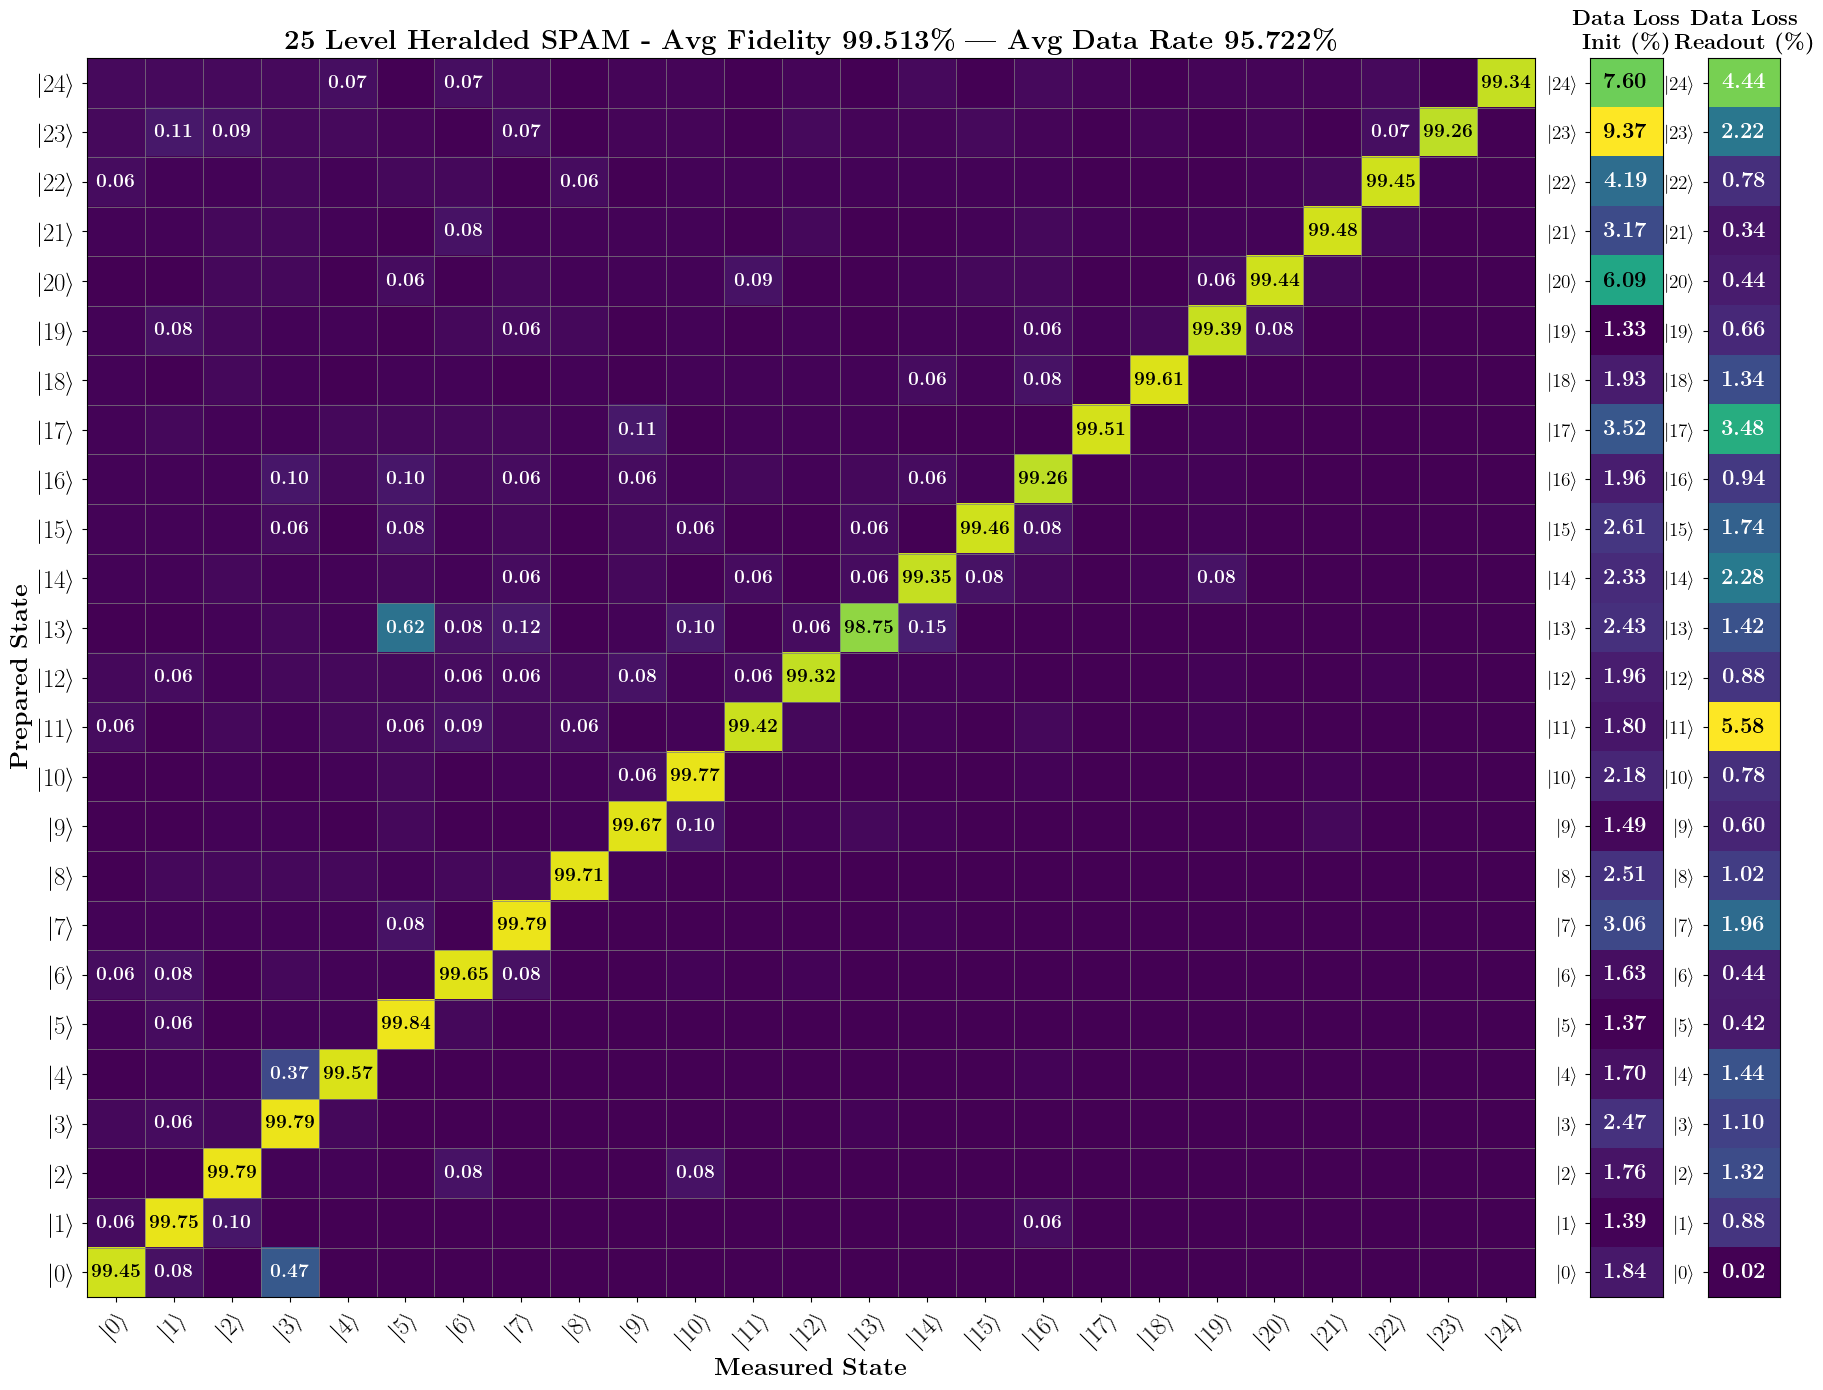

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams

rcParams['font.family'] = 'serif'
rcParams['font.serif'] = ['Computer Modern']
rcParams['text.usetex'] = True


import glob
import json
import re
import os
from mpl_toolkits.axes_grid1 import make_axes_locatable

def load_experiments_from_folder(folder_path, mode='last'):
    """
    Load experiments from a given ket folder.
    
    Each text file in the folder is assumed to contain multiple experiments 
    (one JSON object per line, where each JSON is a list with a dictionary and key "0").
    
    Parameters:
        folder_path: string, path to the ket folder.
        mode: 'last' to load only the last saved file (by sorted order)
              'all' to load all files in the folder.
    
    Returns:
        A list of experiments. Each experiment is a list of counts.
    """
    # Adjust the pattern to match your new file names
    file_pattern = os.path.join(folder_path, 'SPAM_10k_Heralded_*')
    print("Searching files with pattern:", file_pattern)
    file_list = sorted(glob.glob(file_pattern))
    if not file_list:
        return []  # No files found
    if mode == 'last':
        file_list = [file_list[-1]]  # Only the last file

    experiments = []
    for file in file_list:
        with open(file, 'r') as f:
            for line in f:
                data = json.loads(line)
                # Assumes each line is a list with a dict containing key "0"
                experiments.append(data[0]["0"])
    return experiments

def getShelvingThreshold(counts):
    data_sorted = np.sort(counts, axis=None)
    print("Total sorted data points:", len(data_sorted))
    # Remove extreme ends (if possible)
    if len(data_sorted) > 4000:
        data_sorted = data_sorted[2000:-2000]
    if len(data_sorted) > 2000:
        step = round(data_sorted.size / (len(counts) * 0.0250167))
        if step < 1:
            step = 1
        data_sorted = data_sorted[0:-1:step]
    data_sorted_diff = data_sorted[1:-1] - data_sorted[0:-2]
    data_diff_max = max(data_sorted_diff)
    data_diff_maxind = np.argmax(data_sorted_diff)
    threshold = data_diff_max / 2 + data_sorted[data_diff_maxind]
    
    # New logic: if the calculated threshold is less than 2, recalculate using histogram data.
    # if threshold < 2:
        # Calculate histogram in the x-range 4 to 30
    hist_counts, bin_edges = np.histogram(counts, bins=range(4, 31))
    # Find the bin (lowest bar) with the minimum count in that range
    min_bin_index = np.argmin(hist_counts)
    # Use the lower edge of that bin as the threshold
    threshold = bin_edges[min_bin_index] + 0.5
    print(f"Threshold recalculated using histogram: {threshold}")
    
    return threshold, data_sorted

analysis_mode = 'all'  
base_dir = r'Z:\Lab Data\25_level_coherence_paper_data\5K_SPAM'
num_kets = 25  
ket_folders = [os.path.join(base_dir, f'InitKet_{i}') for i in range(num_kets)]

ket_avg_list = [None] * num_kets   # Average trigger vector (before removing first column)
ket_data_rate  = [0] * num_kets    # Data rate for each ket (fraction of experiments with valid trigger)
thresholds_info = [None] * num_kets  # For each ket: (flat_data, threshold, ket index)
all_darks = [0]*num_kets

overall_data_rate = []
for i, folder in enumerate(ket_folders):
    # experiments = load_experiments_from_folder(folder, mode=analysis_mode)
    # if len(experiments) == 0:
    #     print(f'No data found in {folder}. Marking ket {i} as invalid.')
    #     continue

    # experiments = np.array(experiments)  # Shape: (num_experiments, experiment_length)
    # flat_data = experiments.ravel()

    # # Compute threshold and store for histogram plotting
    # try:
    #     threshold, _ = getShelvingThreshold(flat_data)
    # except Exception as e:
    #     print(f'Error computing threshold for ket {i}: {e}')
    #     threshold = None
    # thresholds_info[i] = (flat_data, threshold, i)

    # # Create boolean matrix: mark True if count > 8 (or you could use: experiments > threshold)
    # bool_matrix = experiments >= threshold

    experiments = load_experiments_from_folder(folder, mode=analysis_mode)
    if len(experiments) == 0:
        print(f'No data found in {folder}. Marking ket {i} as invalid.')
        continue
    
    experiments = np.array(experiments)  # Shape: (num_experiments, experiment_length)
    chunk_size = 1000
    num_chunks = len(experiments) // chunk_size
    
    bool_chunks = []
    flat_data_all = []
    
    for j in range(num_chunks):
        chunk = experiments[j * chunk_size : (j + 1) * chunk_size]
        flat_chunk = chunk.ravel()
        flat_data_all.extend(flat_chunk)
    
        try:
            threshold = getShelvingThreshold(flat_chunk)[0]
        except Exception as e:
            print(f'Error computing threshold for ket {i}, chunk {j}: {e}')
            threshold = None
    
        if threshold is not None:
            bool_chunk = chunk >= threshold
        else:
            bool_chunk = np.full(chunk.shape, False)
    
        bool_chunks.append(bool_chunk)
    
    # Concatenate all bool matrices into one
    bool_matrix = np.vstack(bool_chunks)
    
    # Save all flat data and average threshold for plotting (optional)
    avg_threshold = np.mean([getShelvingThreshold(np.ravel(experiments[j * chunk_size : (j + 1) * chunk_size]))[0] for j in range(num_chunks)])
    thresholds_info[i] = (np.array(flat_data_all), avg_threshold, i)
    
    # not_all_dark = []
    not_all_dark_counts = 0
    result_matrix = np.full(bool_matrix.shape, False, dtype=bool)
    print(len(result_matrix))
    for row_index in range(bool_matrix.shape[0]):
        true_indices = np.where(bool_matrix[row_index, :])[0]
        if true_indices.size > 0:
            not_all_dark_counts += 1
            if true_indices[0] != 0:
                result_matrix[row_index, true_indices[0]] = True
    
    # Filter out experiments that never triggered the condition
    # plt.figure()
    # plt.imshow(result_matrix)
    # plt.show()
    all_darks[i] = (len(result_matrix) - not_all_dark_counts)/len(result_matrix)
    print(not_all_dark_counts)
    valid_rows = result_matrix.any(axis=1)
    print(len(valid_rows))
    filtered = result_matrix[valid_rows]
    print(len(filtered))
    data_rate = (not_all_dark_counts - filtered.shape[0]) / not_all_dark_counts
    ket_data_rate[i] = data_rate
    overall_data_rate.append(filtered.shape[0]/len(result_matrix))
    if filtered.shape[0] > 0:
        avg_vector = np.mean(filtered, axis=0)
        ket_avg_list[i] = avg_vector
    else:
        print(f'No valid trigger data for ket {i}.')
        ket_avg_list[i] = None
        ket_data_rate[i] = 0
print(all_darks)
measurement_dim = None
for vec in ket_avg_list:
    if vec is not None and len(vec) > 1:
        measurement_dim = len(vec) - 1
        break
# Build full data matrix with one row per ket.
# For valid kets, use avg_vector[1:]; for invalid, fill with zeros.
data_matrix = np.zeros((num_kets, measurement_dim))
for i in range(num_kets):
    if ket_avg_list[i] is not None and len(ket_avg_list[i]) > 1:
        vec = ket_avg_list[i][1:]
        # If the vector is longer than measurement_dim, truncate; if shorter, pad with zeros.
        if len(vec) >= measurement_dim:
            data_matrix[i, :] = vec[:measurement_dim]
        else:
            data_matrix[i, :len(vec)] = vec
    else:
        # Already zeros
        pass

# Compute fidelity and data rate averages from only valid kets.
valid_fidelity_list = []
valid_data_rate_list = []
for i in range(num_kets):
    if ket_avg_list[i] is not None:
        # For fidelity, mimic your original: use the diagonal element.
        # If i < measurement_dim, use data_matrix[i, i]; otherwise use the last element.
        if i < measurement_dim:
            fidelity = data_matrix[i, i]
        else:
            fidelity = data_matrix[i, -1]
        valid_fidelity_list.append(fidelity)
        if ket_data_rate[i] > 0:
            valid_data_rate_list.append(ket_data_rate[i])

if valid_fidelity_list:
    avg_fidelity = np.mean(valid_fidelity_list)
else:
    avg_fidelity = np.nan
if valid_data_rate_list:
    avg_data_rate = np.mean(valid_data_rate_list)
else:
    avg_data_rate = np.nan

# ===== MAIN ANALYSIS PLOT =====
# fig, ax_main = plt.subplots(1, 1, figsize=(18, 14))

cmap = plt.get_cmap("viridis")
num_prepared = num_kets  # now one row per ket folder
num_measured = measurement_dim

# im = ax_main.imshow(data_matrix, cmap=cmap, aspect='auto')

from matplotlib.colors import LogNorm, Normalize

# # Set the background color to viridis(0) for NaNs
# background_color = plt.get_cmap('viridis')(0)
# ax_main.set_facecolor(background_color)

# diag_mask = np.eye(data_matrix.shape[0], data_matrix.shape[1], dtype=bool)
# off_diag_mask = ~diag_mask

# diag_data = np.where(diag_mask, data_matrix, np.nan)  # nan so it's ignored in off-diag colormap
# off_diag_data = np.where(off_diag_mask, data_matrix, np.nan)

# # Diagonal: linear scale, e.g., from 0.5 to 1
# im_diag = ax_main.imshow(diag_data, cmap='viridis', aspect='auto', norm=Normalize(vmin=0.70, vmax=1))

# # Off-diagonal: log scale, e.g., from 1e-4 to 0.5
# im_off_diag = ax_main.imshow(off_diag_data, cmap='viridis', aspect='auto', norm=Normalize(vmin=1e-4, vmax=30))

from matplotlib.colors import ListedColormap, BoundaryNorm
import matplotlib.cm as cm

# Create masked arrays
diag_mask = np.eye(data_matrix.shape[0], data_matrix.shape[1], dtype=bool)
off_diag_mask = ~diag_mask

diag_data = np.where(diag_mask, data_matrix, np.nan)
off_diag_data = np.where(off_diag_mask, data_matrix, np.nan)

# Flatten and filter out NaNs to determine boundaries
all_data = np.concatenate([diag_data[~np.isnan(diag_data)], off_diag_data[~np.isnan(off_diag_data)]])
vmin = 0.0
vmax = 1.0

# Custom normalization ranges
diag_range = (0.98, 1.0)
off_diag_range = (0.0, 0.007)

# Sample colormap
viridis = plt.get_cmap("viridis")

# Extract colors from viridis for the two segments
off_diag_colors = [viridis(x) for x in np.linspace(0.00, 0.4, 128)]
diag_colors = [viridis(x) for x in np.linspace(0.75, 1.0, 64)]

# Combine color segments
combined_colors = off_diag_colors + [(0, 0, 0, 0)] * 10 + diag_colors  # optional transparent buffer
custom_cmap = ListedColormap(combined_colors)

# Define boundaries for normalization
boundaries = np.concatenate([
    np.linspace(off_diag_range[0], off_diag_range[1], len(off_diag_colors), endpoint=False),
    np.linspace(diag_range[0], diag_range[1], len(diag_colors))
])
norm = BoundaryNorm(boundaries, custom_cmap.N)

# Plot the masked data
fig, ax_main = plt.subplots(1, 1, figsize=(18, 14))
ax_main.set_facecolor(viridis(0))  # background color for NaNs

# Overlay off-diagonal first, then diagonal
ax_main.imshow(np.ma.masked_invalid(off_diag_data), cmap=custom_cmap, norm=norm, aspect='auto')
ax_main.imshow(np.ma.masked_invalid(diag_data), cmap=custom_cmap, norm=norm, aspect='auto')


tick_labels_x = [f'$|{j}\\rangle$' for j in range(num_measured)]
tick_labels_y = [f'$|{i}\\rangle$' for i in range(num_kets)]
ax_main.set_xticks(np.arange(num_measured))
ax_main.set_xticklabels(tick_labels_x, fontsize=18, rotation=45)
ax_main.set_yticks(np.arange(num_kets))
ax_main.set_yticklabels(tick_labels_y, fontsize=18)
ax_main.invert_yaxis()
ax_main.set_xlabel(r'\textbf{Measured State}', fontsize=18)
ax_main.set_ylabel(r'\textbf{Prepared State}', fontsize=18)

# Annotate each cell with its percentage value.
# Also for rows with no valid data, add a centered annotation.
for i in range(num_kets):
    if ket_avg_list[i] is None:
        ax_main.text(num_measured/2, i, 'No Valid Data', ha='center', va='center', 
                     color='red', fontsize=12, fontweight='bold')
    else:
        for j in range(num_measured):
            if data_matrix[i, j] > 0.0005:
                ax_main.text(j, i, rf'\textbf{{{data_matrix[i, j]*100:.2f}}}', ha='center', va='center',
                             color='black' if data_matrix[i, j] > 0.5 else 'white', fontsize=14)

ax_main.set_title(rf'\textbf{{{num_measured} Level Heralded SPAM - Avg Fidelity {np.round(avg_fidelity * 100, 3)}\%  |  Avg Data Rate {np.round(np.mean(overall_data_rate) * 100, 3)}\%}}', fontsize=20)

# Add grid lines
for x in np.arange(-0.5, num_measured, 1):
    ax_main.axvline(x, color='gray', linestyle='-', linewidth=0.5)
for y in np.arange(-0.5, num_prepared, 1):
    ax_main.axhline(y, color='gray', linestyle='-', linewidth=0.5)


# Side plot for data rate (one row per ket)
# Create divider to append two side axes to ax_main
divider = make_axes_locatable(ax_main)
cax1 = divider.append_axes("right", size="5%", pad=0.550)
cax2 = divider.append_axes("right", size="5%", pad=0.45)

# First side plot: ket_data_rate
# side_data_rate = (np.array(ket_data_rate)).reshape(num_kets, 1)
# im_side1 = cax1.imshow(side_data_rate, cmap='viridis', aspect='auto', norm=LogNorm(vmin=1e-4, vmax=100))
# cax1.set_yticks(np.arange(num_kets))
# cax1.set_yticklabels(tick_labels_y, fontsize=12)
# cax1.set_xticks([])
# cax1.invert_yaxis()
# cax1.set_title('Data Rate', fontsize=10)
# for i in range(num_kets):
#     cax1.text(0, i, f'{ket_data_rate[i] * 100:.1f}%', ha='center', va='center', color='black', fontsize=10)

# # Second side plot: all_darks
# side_darks = (np.array(all_darks)).reshape(num_kets, 1)
# im_side2 = cax2.imshow(side_darks, cmap='viridis', aspect='auto', norm=LogNorm(vmin=1e-4, vmax=100))
# cax2.set_yticks(np.arange(num_kets))
# cax2.set_yticklabels([])
# cax2.set_xticks([])
# cax2.invert_yaxis()
# cax2.set_title('All Dark', fontsize=10)
# for i in range(num_kets):
#     cax2.text(0, i, f'{all_darks[i] * 100:.1f}%', ha='center', va='center', color='black', fontsize=10)

# First side plot: ket_data_rate
side_data_rate = np.array(ket_data_rate).reshape(num_kets, 1)
min_rate = max(np.min(side_data_rate[side_data_rate > 0]), 1e-6)
max_rate = np.max(side_data_rate)
im_side1 = cax1.imshow(side_data_rate, cmap='viridis', aspect='auto', norm=Normalize(vmin=min_rate, vmax=max_rate))
cax1.set_yticks(np.arange(num_kets))
cax1.set_yticklabels(tick_labels_y, fontsize=14)
cax1.set_xticks([])
cax1.invert_yaxis()
cax1.set_title(r'\textbf{Data Loss}' '\n' r'\textbf{Init (\%)}', fontsize=16)
for i in range(num_kets):
    cax1.text(0, i, rf'\textbf{{{ket_data_rate[i] * 100:.2f}}}', ha='center', va='center', color='black' if ket_data_rate[i] > 0.05 else 'white', fontsize=16)

# Second side plot: all_darks
side_darks = np.array(all_darks).reshape(num_kets, 1)
min_dark = max(np.min(side_darks[side_darks > 0]), 1e-6)
max_dark = np.max(side_darks)
im_side2 = cax2.imshow(side_darks, cmap='viridis', aspect='auto', norm=Normalize(vmin=min_dark, vmax=max_dark))
cax2.set_yticks(np.arange(num_kets))
cax2.set_yticklabels(tick_labels_y, fontsize=14)
cax2.set_xticks([])
cax2.invert_yaxis()
cax2.set_title(r'\textbf{Data Loss}' '\n' r'\textbf{Readout (\%)}', fontsize=16)
for i in range(num_kets):
    cax2.text(0, i, rf'\textbf{{{all_darks[i] * 100:.2f}}}', ha='center', va='center', color='black' if all_darks[i] > 0.05 else 'white', fontsize=16)

# plt.clf()
# plt.close()
plt.tight_layout()
plt.savefig('SPAM_paper_data_5k_exp.svg', format='svg')
# plt.savefig('SPAM_paper_data_5k_exp.png', dpi=800)
# # Plot one histogram per ket for up to 25 kets.
# num_threshold_plots = min(25, num_kets)
# fig, axs = plt.subplots(5, 5, figsize=(20, 20))
# axs = axs.flatten()

# for idx in range(num_threshold_plots):
#     ax = axs[idx]
#     info = thresholds_info[idx]
#     if info is not None and info[1] is not None:
#         flat_data, threshold, ket_idx = info
#         bins = int(max(flat_data)) if max(flat_data) > 0 else 10
#         ax.hist(flat_data, bins=bins, color='blue', alpha=0.7)
#         # Plot vertical line at threshold
#         ax.axvline(threshold, color='red', linestyle='--', label=f'Th={threshold:.2f}')
#         ax.set_title(f'Ket {ket_idx}', fontsize=10)
#         ax.set_yscale('log')
#         ax.legend(fontsize=8)
#     else:
#         ax.text(0.5, 0.5, 'No Valid Data', ha='center', va='center', color='red', fontsize=12)
#         ax.set_xticks([])
#         ax.set_yticks([])
    
# # Turn off any unused subplots in the 5x5 grid
# for idx in range(num_threshold_plots, 25):
#     axs[idx].axis('off')
    
# plt.tight_layout()
# # plt.savefig('threshold_histograms_5x5.png', dpi=300)
# plt.show()
